<a href="https://colab.research.google.com/github/sreelekshmyanil/DL-Assignments---VIT/blob/main/VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20MAI0017**

**SREELEKSHMY A**

***VGG 16***

VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

IMPLEMENTATION

In [85]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

In [79]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

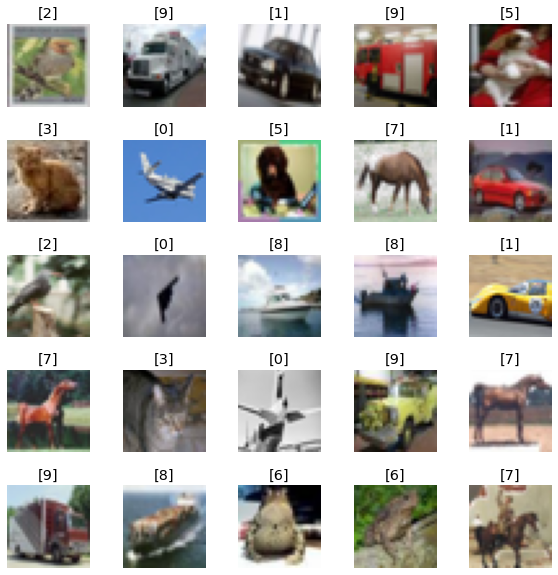

In [80]:
W_grid=5
L_grid=5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) 
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index]) 
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [81]:
#Train-validation-test split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [82]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [83]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [84]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [86]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

Model with Batch Normalization

In [88]:
#VGG16 Model
base_model_vgg16 = VGG16(include_top = False, weights= 'imagenet', input_shape = (32,32,3), classes = y_train.shape[1])

#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_vgg16= Sequential()
model_vgg16.add(base_model_vgg16) 
model_vgg16.add(Flatten())
#Adding the Dense layers along with activation and batch normalization
model_vgg16.add(Dense(1024,activation=('relu'),input_dim=512))
model_vgg16.add(Dense(512,activation=('relu'))) 
model_vgg16.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model_vgg16.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))

#Batch Normalization
model_vgg16.add(BatchNormalization())
model_vgg16.add(Dense(10,activation=('softmax')))

#Checking the final VGG16 model summary
model_vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)              

In [89]:
#Compiling VGG16
model_vgg16.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Training VGG16
model_vgg16.fit_generator(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps=250, callbacks=[lrr], verbose=1)

Epoch 1/50
350/350 [==============================] - 28s 77ms/step - loss: 1.4703 - accuracy: 0.4896 - val_loss: 0.9757 - val_accuracy: 0.6734
Epoch 2/50
350/350 [==============================] - 21s 59ms/step - loss: 0.7065 - accuracy: 0.7565
Epoch 3/50
350/350 [==============================] - 21s 59ms/step - loss: 0.5672 - accuracy: 0.8054
Epoch 4/50
350/350 [==============================] - 21s 59ms/step - loss: 0.4957 - accuracy: 0.8282
Epoch 5/50
350/350 [==============================] - 21s 59ms/step - loss: 0.4260 - accuracy: 0.8538
Epoch 6/50
350/350 [==============================] - 21s 59ms/step - loss: 0.3790 - accuracy: 0.8700
Epoch 7/50
350/350 [==============================] - 21s 60ms/step - loss: 0.3327 - accuracy: 0.8854
Epoch 8/50
350/350 [==============================] - 21s 60ms/step - loss: 0.2944 - accuracy: 0.9002
Epoch 9/50
350/350 [==============================] - 21s 60ms/step - loss: 0.2578 - accuracy: 0.9096
Epoch 10/50
350/350 [===================

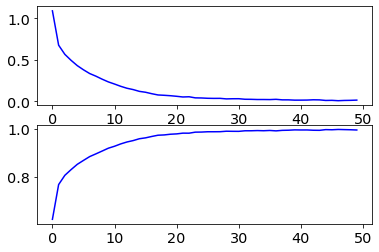

In [90]:
#Plotting the VGG16 training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(model_vgg16.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_vgg16.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(model_vgg16.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model_vgg16.history.history['val_accuracy'],color='r',label='Validation Accuracy')

Confusion matrix, without normalization


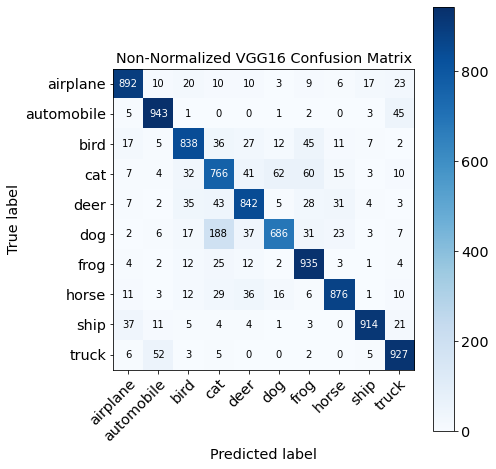

In [91]:
#Making prediction
y_pred2=model_vgg16.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Plotting the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred2)

#Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred2, classes = class_names,title = 'Non-Normalized VGG16 Confusion Matrix')

In [92]:
#Accuracy of VGG16
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred2)

0.8619